# Data Preparation

In [15]:
#import necessary Python libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [16]:
#read the dataset
data = pd.read_csv('Tesla_Latest_Stock_Data.csv')
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,16711100,0,0.0
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,14200300,0,0.0
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,22020000,0,0.0
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,14120100,0,0.0
2844,2021-10-14,815.489990,820.250000,813.349976,818.320007,12203200,0,0.0


In [17]:
#check for null values
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [18]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03,2845.0,2845.000000
mean,105.797199,107.959321,103.485805,105.853488,3.145634e+07,0.0,0.001757
std,188.691743,192.434544,184.592519,188.788993,2.845125e+07,0.0,0.093741
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05,0.0,0.000000
25%,10.352000,10.748000,10.132000,10.400000,1.252200e+07,0.0,0.000000
50%,45.868000,46.493999,45.099998,45.902000,2.482100e+07,0.0,0.000000
75%,65.000000,66.251999,63.993999,65.234001,4.014650e+07,0.0,0.000000
max,891.380005,900.400024,871.599976,883.090027,3.046940e+08,0.0,5.000000


In [19]:
#change to date-time format
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


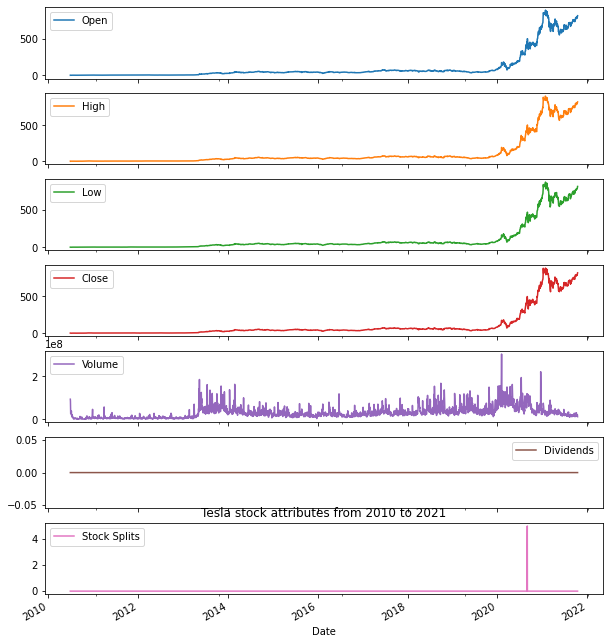

In [20]:
#data visulization
data.set_index('Date',inplace=True)
data.plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2010 to 2021')
plt.savefig('stocks.png')
plt.show()

<AxesSubplot:xlabel='Date'>

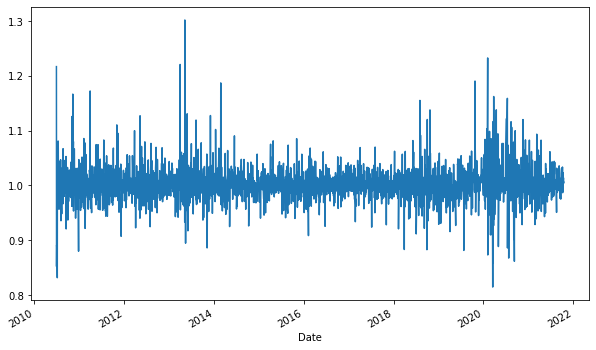

In [21]:
#change in percentage
data['Change'] = data.High.div(data.High.shift())
data['Change'].plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

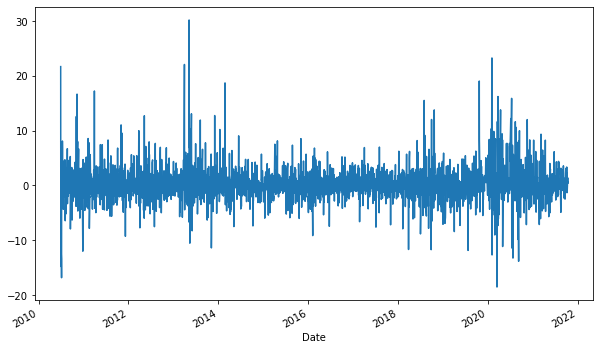

In [22]:
#return of the stocks
data['Return'] = data.Change.sub(1).mul(100)
data['Return'].plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

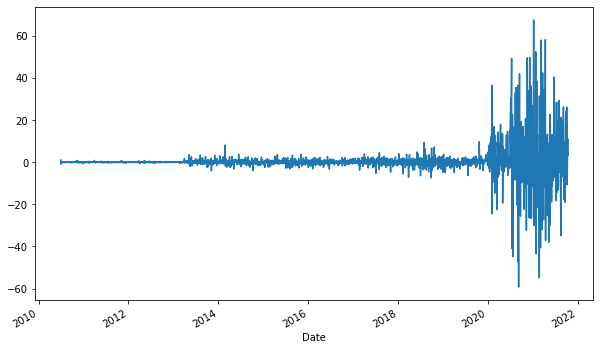

In [23]:
data.High.diff().plot(figsize=(10,6))

In [39]:
%matplotlib inline
from pylab import rcParams
from chart_studio import plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [25]:
# OHLC chart of October 2021
trace = go.Ohlc(x=data['10-2021'].index,
                open=data['10-2021'].Open,
                high=data['10-2021'].High,
                low=data['10-2021'].Low,
                close=data['10-2021'].Close)
df = [trace]
iplot(df, filename='simple_ohlc')

In [26]:
# OHLC chart of 2021
trace = go.Ohlc(x=data['2021'].index,
                open=data['2021'].Open,
                high=data['2021'].High,
                low=data['2021'].Low,
                close=data['2021'].Close)
df = [trace]
iplot(df, filename='simple_ohlc')

In [27]:
# OHLC chart of 2020
trace = go.Ohlc(x=data['2020'].index,
                open=data['2020'].Open,
                high=data['2020'].High,
                low=data['2020'].Low,
                close=data['2020'].Close)
df = [trace]
iplot(df, filename='simple_ohlc')

In [28]:
# OHLC chart from 2010 to 2021
trace = go.Ohlc(x=data.index,
                open=data.Open,
                high=data.High,
                low=data.Low,
                close=data.Close)
df = [trace]
iplot(df, filename='simple_ohlc')

In [50]:
# Candlestick chart of October 2021
trace = go.Candlestick(x=data['2021'].index,
                open=data['2021'].Open,
                high=data['2021'].High,
                low=data['2021'].Low,
                close=data['2021'].Close)
df = [trace]
iplot(df, filename='simple_candlestick')

In [51]:
# Candlestick chart of 2021
trace = go.Candlestick(x=data['2021'].index,
                open=data['2021'].Open,
                high=data['2021'].High,
                low=data['2021'].Low,
                close=data['2021'].Close)
df = [trace]
iplot(df, filename='simple_candlestick')

In [52]:
# Candlestick chart of 2010-2021
trace = go.Candlestick(x=data.index,
                open=data.Open,
                high=data.High,
                low=data.Low,
                close=data.Close)
df = [trace]
iplot(df, filename='simple_candlestick')

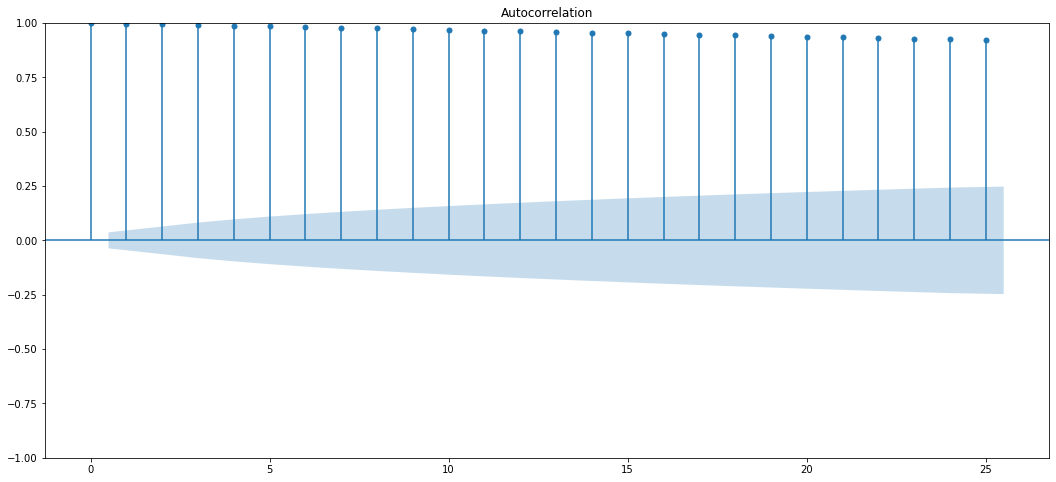

In [53]:
# Autocorrelation of closing price of tesla stocks
plot_acf(data["Close"],lags=25)
plt.show()

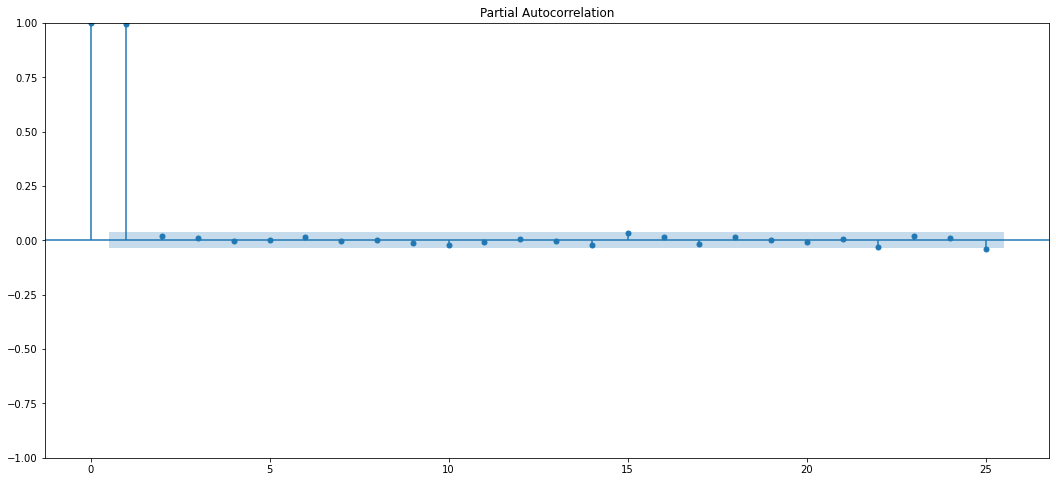

In [54]:
# Partial Autocorrelation of closing price of tesla stocks
plot_pacf(data["Close"],lags=25)
plt.show()

<AxesSubplot:xlabel='Date'>

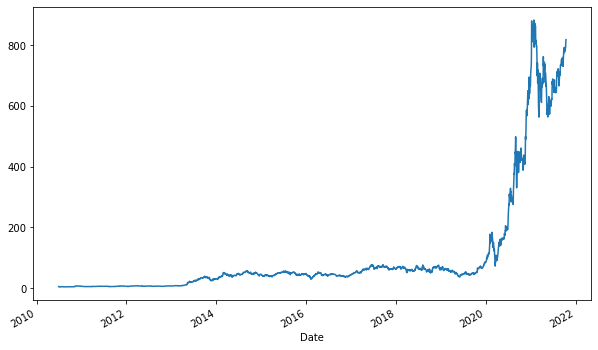

In [67]:
# Let's take Tesla stocks High for this
data["Close"].plot(figsize=(10,6))

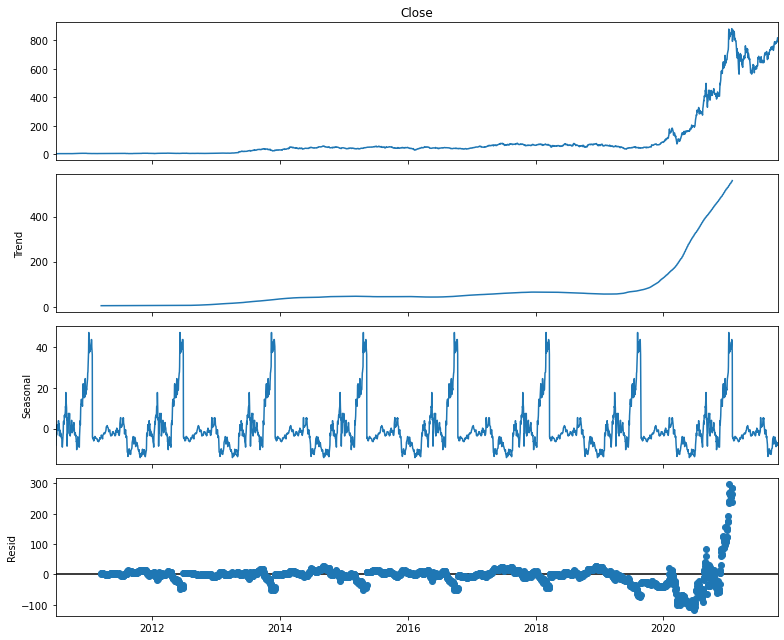

In [65]:
rcParams['figure.figsize'] = 11, 9
# Convert the index to a DatetimeIndex if needed
data.index = pd.to_datetime(data.index)
# Perform seasonal decomposition
decomposed_tesla_volume = seasonal_decompose(data["Close"], period=360)  # Set the period to 360 for annual frequency
# Plot the decomposition
figure = decomposed_tesla_volume.plot()
plt.show()







In [69]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data['High'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject null hypothesis thereby data is non-stationary ")

ADF Test:
ADF Statistic: 2.0968124513079007
p-value: 0.9987862699362579
No. of Lags Used: 28
Number of Observations Used: 2816
Fail to reject null hypothesis thereby data is non-stationary 


In [70]:
# Store in a function for later use!
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject null hypothesis and data is non-stationary ")

In [71]:
data ['First Difference'] = data ['Close'] - data ['Close']. shift (1)
check_adf(data['First Difference'].dropna())

ADF Test:
ADF Statistic: -8.94707136855179
p-value: 8.928853915483603e-15
No. of Lags Used: 28
Number of Observations Used: 2815
Reject null hypothesis and data is stationary


<AxesSubplot:xlabel='Date'>

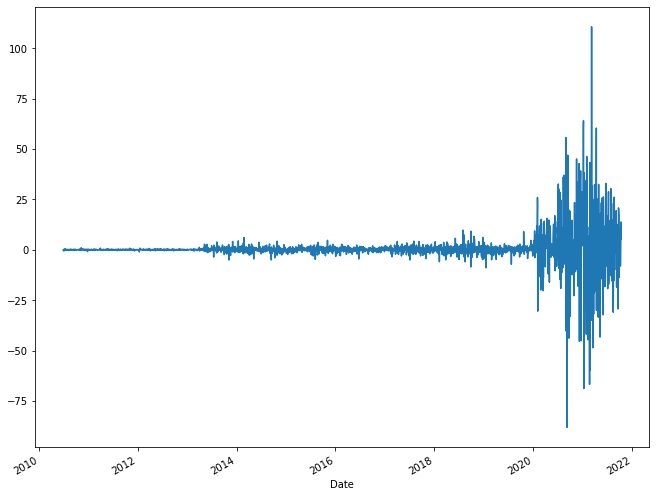

In [72]:
data ['First Difference']. plot ()

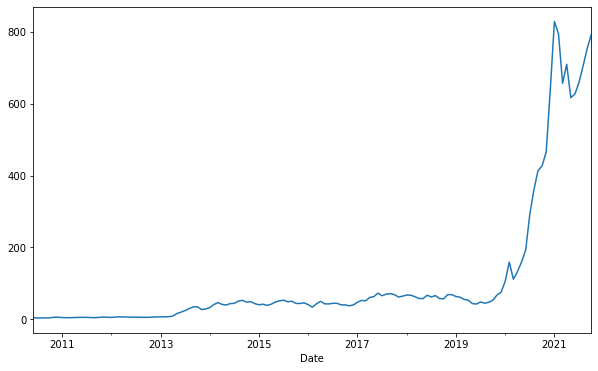

In [74]:
y = data['Close'].resample('MS').mean()
y.plot(figsize=(10, 6))
plt.show()

In [75]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
import itertools
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [76]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1857.21808779175
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1662.1001392934886
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1622.584960393631
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1447.7046453221315
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1565.118582956892
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1553.136896102607
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1450.5231504220562
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1438.9722203665574
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1682.1522633028057
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1499.0349081441032
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1458.7667285198336
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1295.2379219858126
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1411.1416774656088
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1394.0763974098484
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1310.769000919005
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1287.8242301800497
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1316.935826120405
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1203.3676925062287

In [77]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2068      0.130     -1.596      0.111      -0.461       0.047
ma.L1          0.5840      0.141      4.147      0.000       0.308       0.860
ar.S.L12       0.0005      1.863      0.000      1.000      -3.650       3.651
ma.S.L12      -0.2686      1.844     -0.146      0.884      -3.882       3.345
sigma2       936.6604     61.736     15.172      0.000     815.660    1057.661


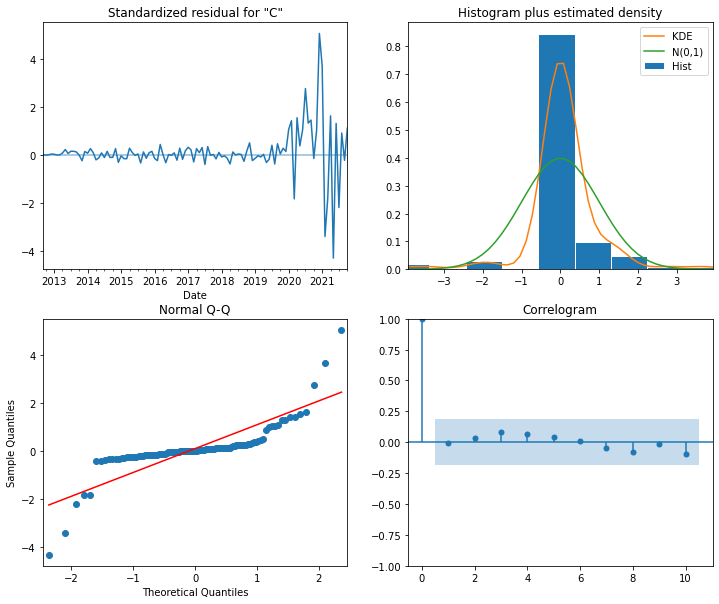

In [78]:
results.plot_diagnostics(figsize=(12, 10))
plt.show()

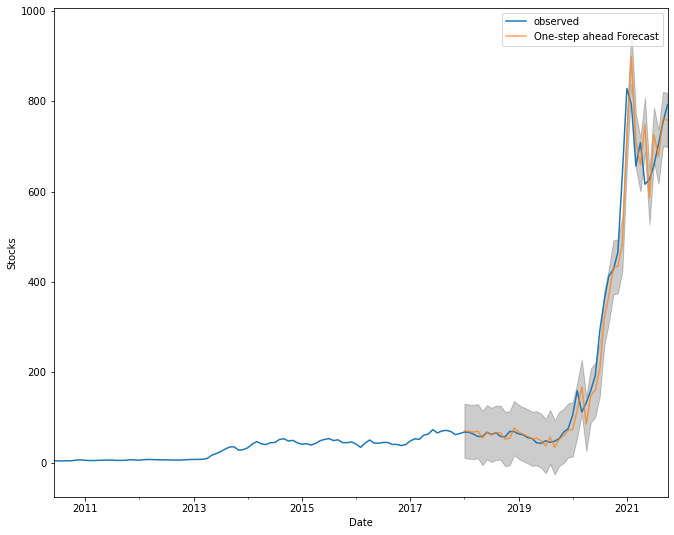

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Stocks')
plt.legend()

plt.show()

In [81]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2195.76


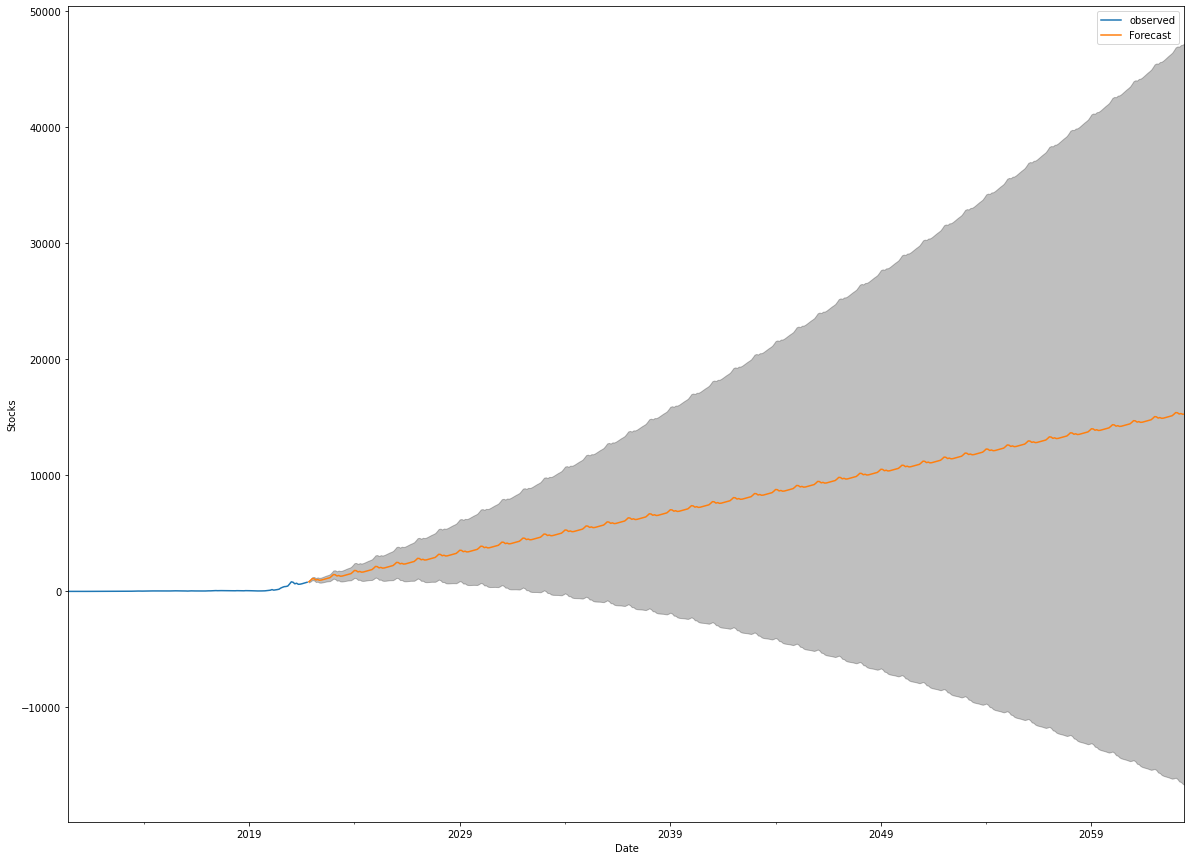

In [82]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stocks')

plt.legend()
plt.show()